# University Admission Prediction Using Multiple Linear Regression

This hands-on project aims to train a regression model to find the probability of a student  getting accepted into a particular university based on their profile. This project could be practically used to get the university acceptance rate for individual students using web application.

Think of this project as a project that could be implemented at the university side. The university could collect all the data beforehand in which the commitee, for example, that decide which studens should be able to enroll in it will be accepted in a university program based on the features we can extract all that data such as GRE Score, TOEFL score, university rating, statement of purpose, Letter of Recommendation, GPA and research experience. 

**[Data source](https://www.kaggle.com/mohansacharya/graduate-admissions)**

## TASK #1: UNDERSTAND THE PROBLEM STATEMENT

The problem statement is: 
* What does the dataset shows as a broad ideia? 
* What insights and profile can we get from this datase?
* How can we train and evaluate an artificial neural network to perform a regression task for us?

The data set contains some information that will give us the answer. The dataframe has the following information:
Inputs features:
 * GRE Scores (out of 340)
 * TOEFL Scores (out of 120)
 * University Rating (out of 5)
 * Statement of purpose (SOP)
 * Letter of recommendation (LOR) strength (out of 5)
 * Undergraduate GPA (out of 10)
 * REsearch Experience (either 0 or 1)

Outputs:
 * Chance of admission (rating from 0 to 1)

## TASK #2: IMPORT LIBRARIES AND DATASET

To work with the data frame, we are going to import some libraries, such as pandas (used for data frame manipulation), numpy (used for numerical analysis), seaborn (used for data visualization) and matplotlib (used for data visualization as well)

We are also going to do some checks about the data frame to see if there are some information we need to be aware of it, before working with it. 

In [21]:
import pandas as pd #used for data frame manipulation
import numpy as np #used for numerical analysis
import seaborn as sns #used for data visualization
import matplotlib.pyplot as plt #used for data visualization
import warnings
warnings.filterwarnings("ignore")
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

The **.read_csv** is a method to read the file and link it to the variable, in this case *admission_df*

In [22]:
admission_df = pd.read_csv('../data/Admission_Predict.csv')

The **.head(n)** is a method that returns a specified number of rows, string from the top. 
*n* is the parameter, and by default, **.head()** method returns the first 5 rows. 

In [23]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The **.count()** method will give us an idea on how many data we have for each column in the data frame.

In [24]:
admission_df.count()

Serial No.           500
GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

Now that we have an ideia of how many values we have in this dataframe, we are going to use a combination of methods to check how many *null values* are in teh data frame:

In [25]:
# checking the null values. If I have any null values, we can drop or fill with mean values
admission_df.isnull().sum() 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now we can check the dataframe information by using the method **.info()**. Using this method we will have the information of null values, data type, and columns.

In [26]:
# Check the dataframe information. How many elements we have with the data type for each of them
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

Now that we have imported the data set,  defined the dataframe, imported libraries and checked the data, we acheived the **prepare** and **process** the data, so we can go on and do the **analysis** and some **visualization** based on the insights that we got here

Because we are not going to use the *Serial No.* column, we are going to drop it in memory, so we can use only the parameters we want to do the analysis.

In [27]:
# Let's drop the serial no.
#axis = 1 indicates drop the entire column
#inplace = True indicates that the column will be dropped in memory
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


The first analysis we are going to do is the description of the data frame, so we can know the min and max value for each column, mean, count, and the standard deviation which is the measure of the dispertion away from the mean.
So, for example, when it comes to GRE Score, the max score is 340 and the min score is 290. The mean is 316 and values within the data frame are within about 11 units of the mean. 

In [28]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's now make an analysis grouping the information by *University Rating* to have an ideia of the mean numbers for each category.
The formula below groups by university rating and brings the mean info for each column. For example, the universities that has a rating of 1, on average, students have a GRE Score of 304

In [29]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating')
df_university.mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


We can also describe the information for each rating. So, let's get for example, the University with ranking 3 and check the profile of students that would be admited to the university. 

In [30]:
df_university1 = df_university.get_group(3)
df_university1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,162.000000,162.000000,162.0,162.000000,162.000000,162.000000,162.000000,162.000000
mean,315.030864,106.314815,3.0,3.308642,3.401235,8.500123,0.537037,0.702901
std,8.096025,4.333134,0.0,0.645423,0.755599,0.406011,0.500173,0.098427
min,297.000000,97.000000,3.0,2.000000,1.500000,7.400000,0.000000,0.360000
25%,311.000000,103.000000,3.0,3.000000,3.000000,8.210000,0.000000,0.642500
50%,316.000000,106.000000,3.0,3.500000,3.500000,8.545000,1.000000,0.720000
75%,321.000000,110.000000,3.0,3.500000,4.000000,8.780000,1.000000,0.770000
max,331.000000,120.000000,3.0,5.000000,5.000000,9.320000,1.000000,0.900000


## TASK #4: PERFORM DATA VISUALIZATION

Now, let's perform some data visualization. We will plot the histogram, or distribution of all variables to check where the data is concentrated.
Distribution graph displays the spread of various outcomes in a dataset. 
From the distribution graphs below, we can notice that the ammount of students is higher in the middle of the graph, where the meand grades are.

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

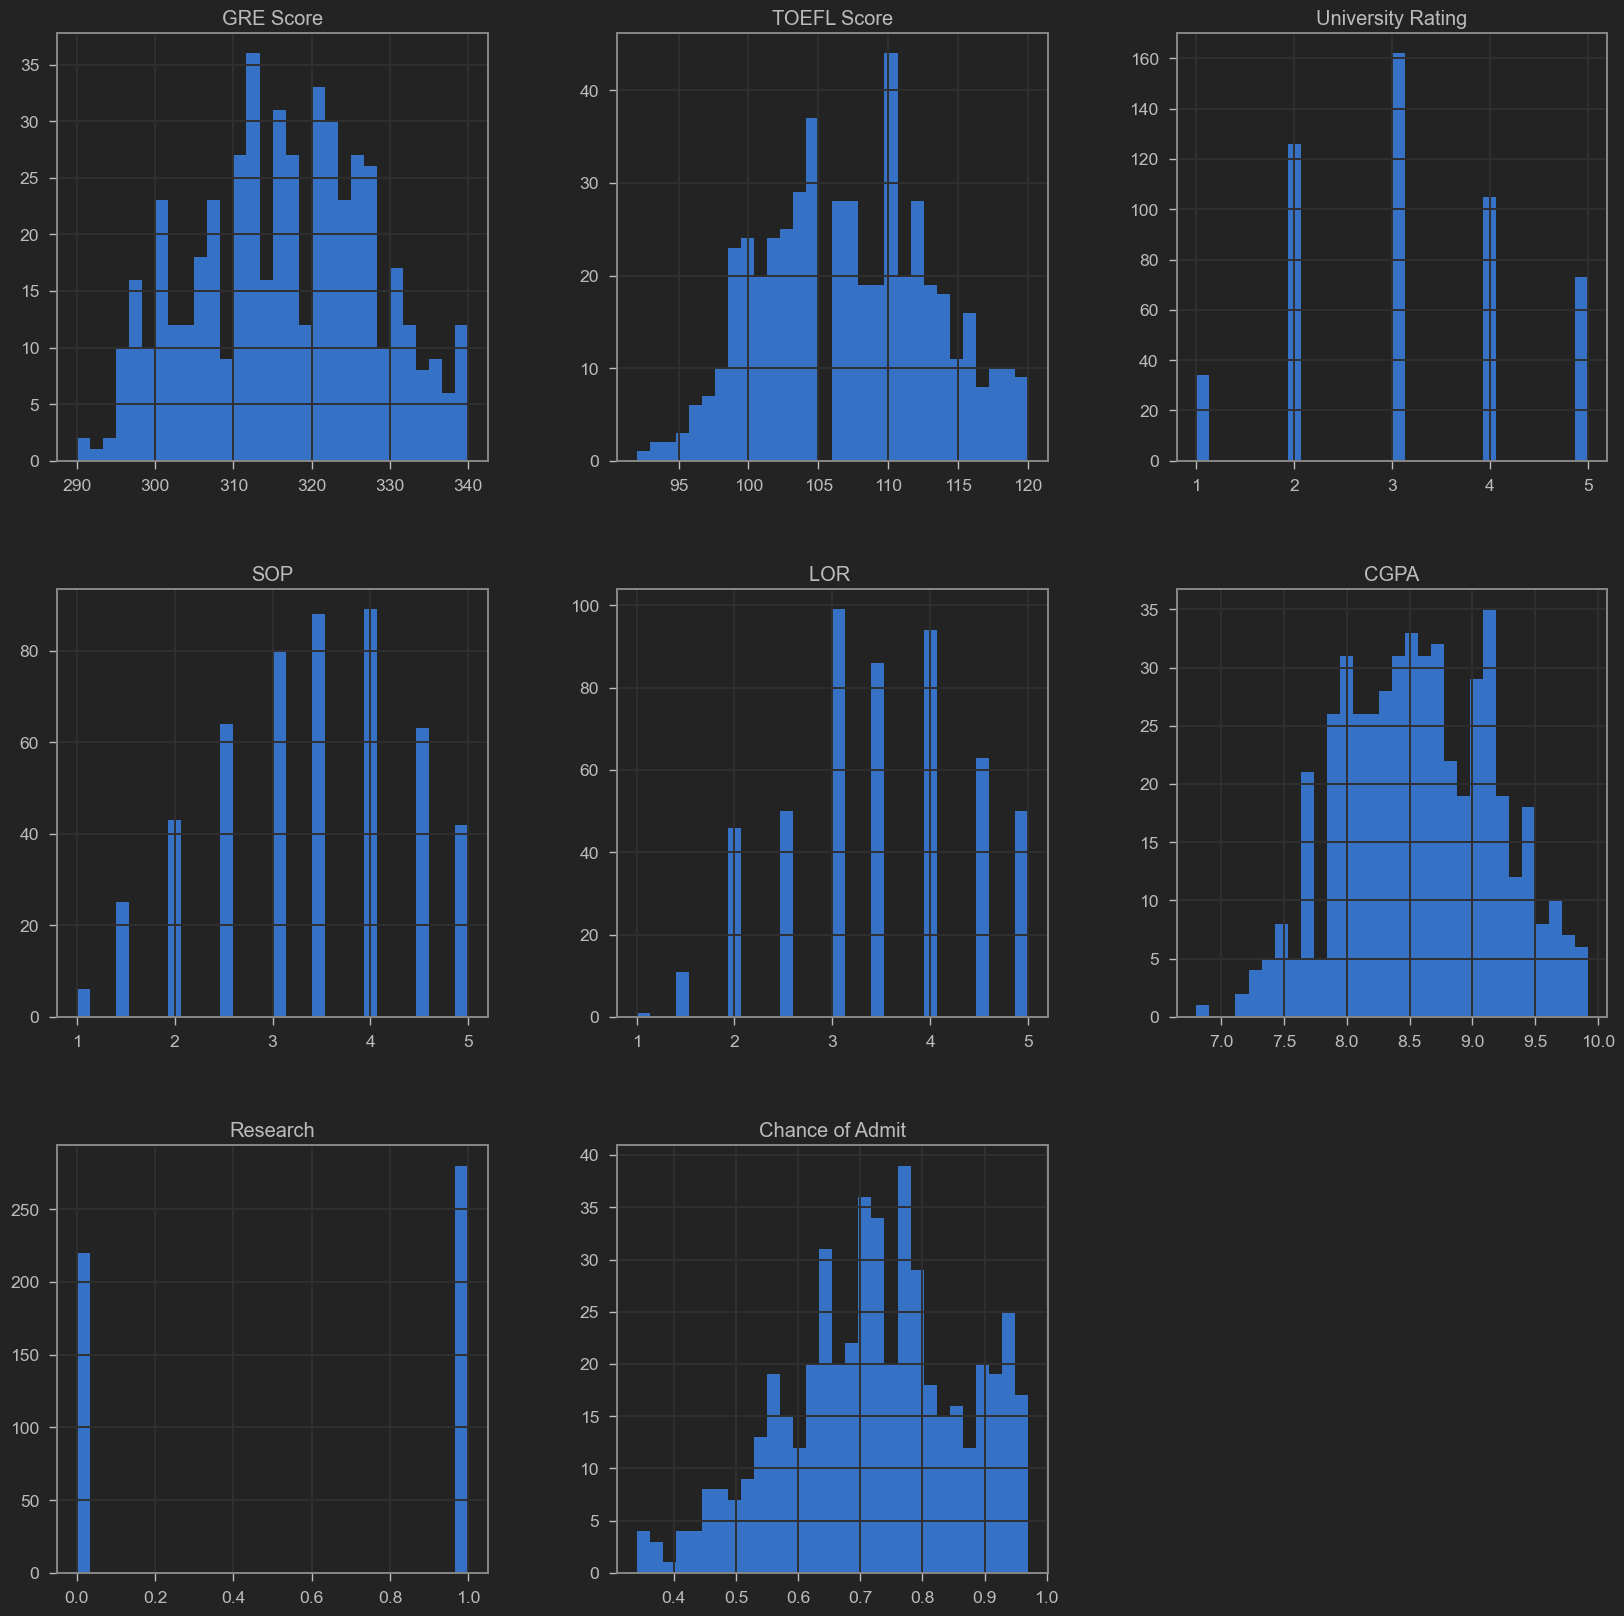

In [31]:
#plot the histogram, or distribuition of all our variables
admission_df.hist(bins = 30, figsize = (20, 20), color = 'b')

Another way to display a distribution graph is by using the **.histplot** for each column
Here we are defining the bins = 30, which means that we are dividing the data into 30 equally spaced intervals on the x-axis of the histogram

Text(0.5, 1.0, 'Distribution of GRE Scores')

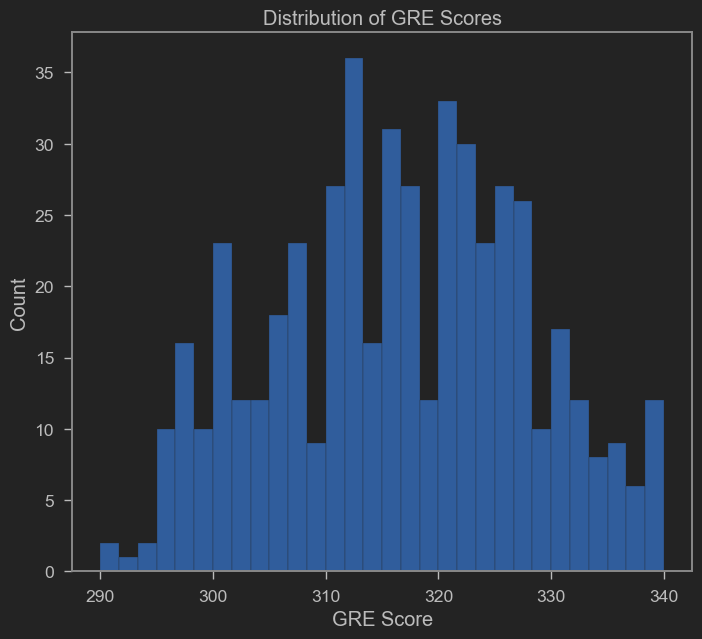

In [32]:
sns.histplot(admission_df['GRE Score'], bins=30, kde=False, color='b')
plt.title("Distribution of GRE Scores")

Text(0.5, 1.0, 'Distribution of TOEFL Scores')

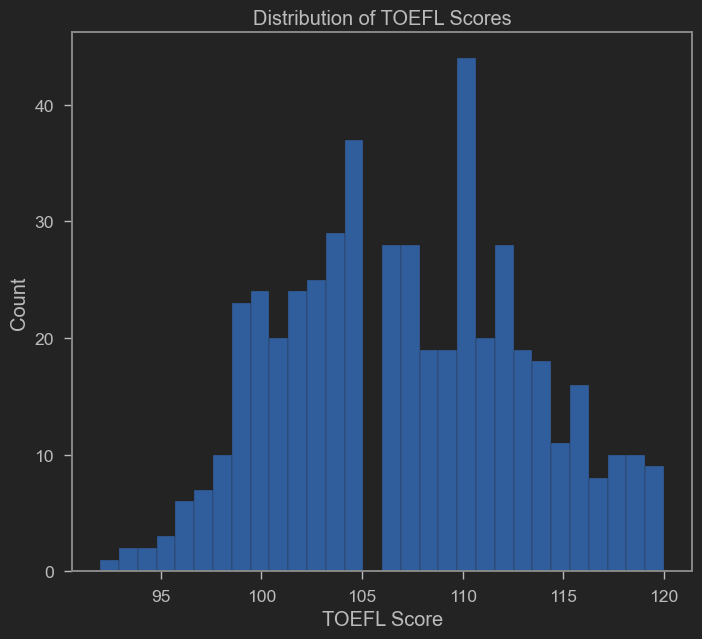

In [33]:
sns.histplot(admission_df['TOEFL Score'], bins=30, kde=False, color='b')
plt.title("Distribution of TOEFL Scores")

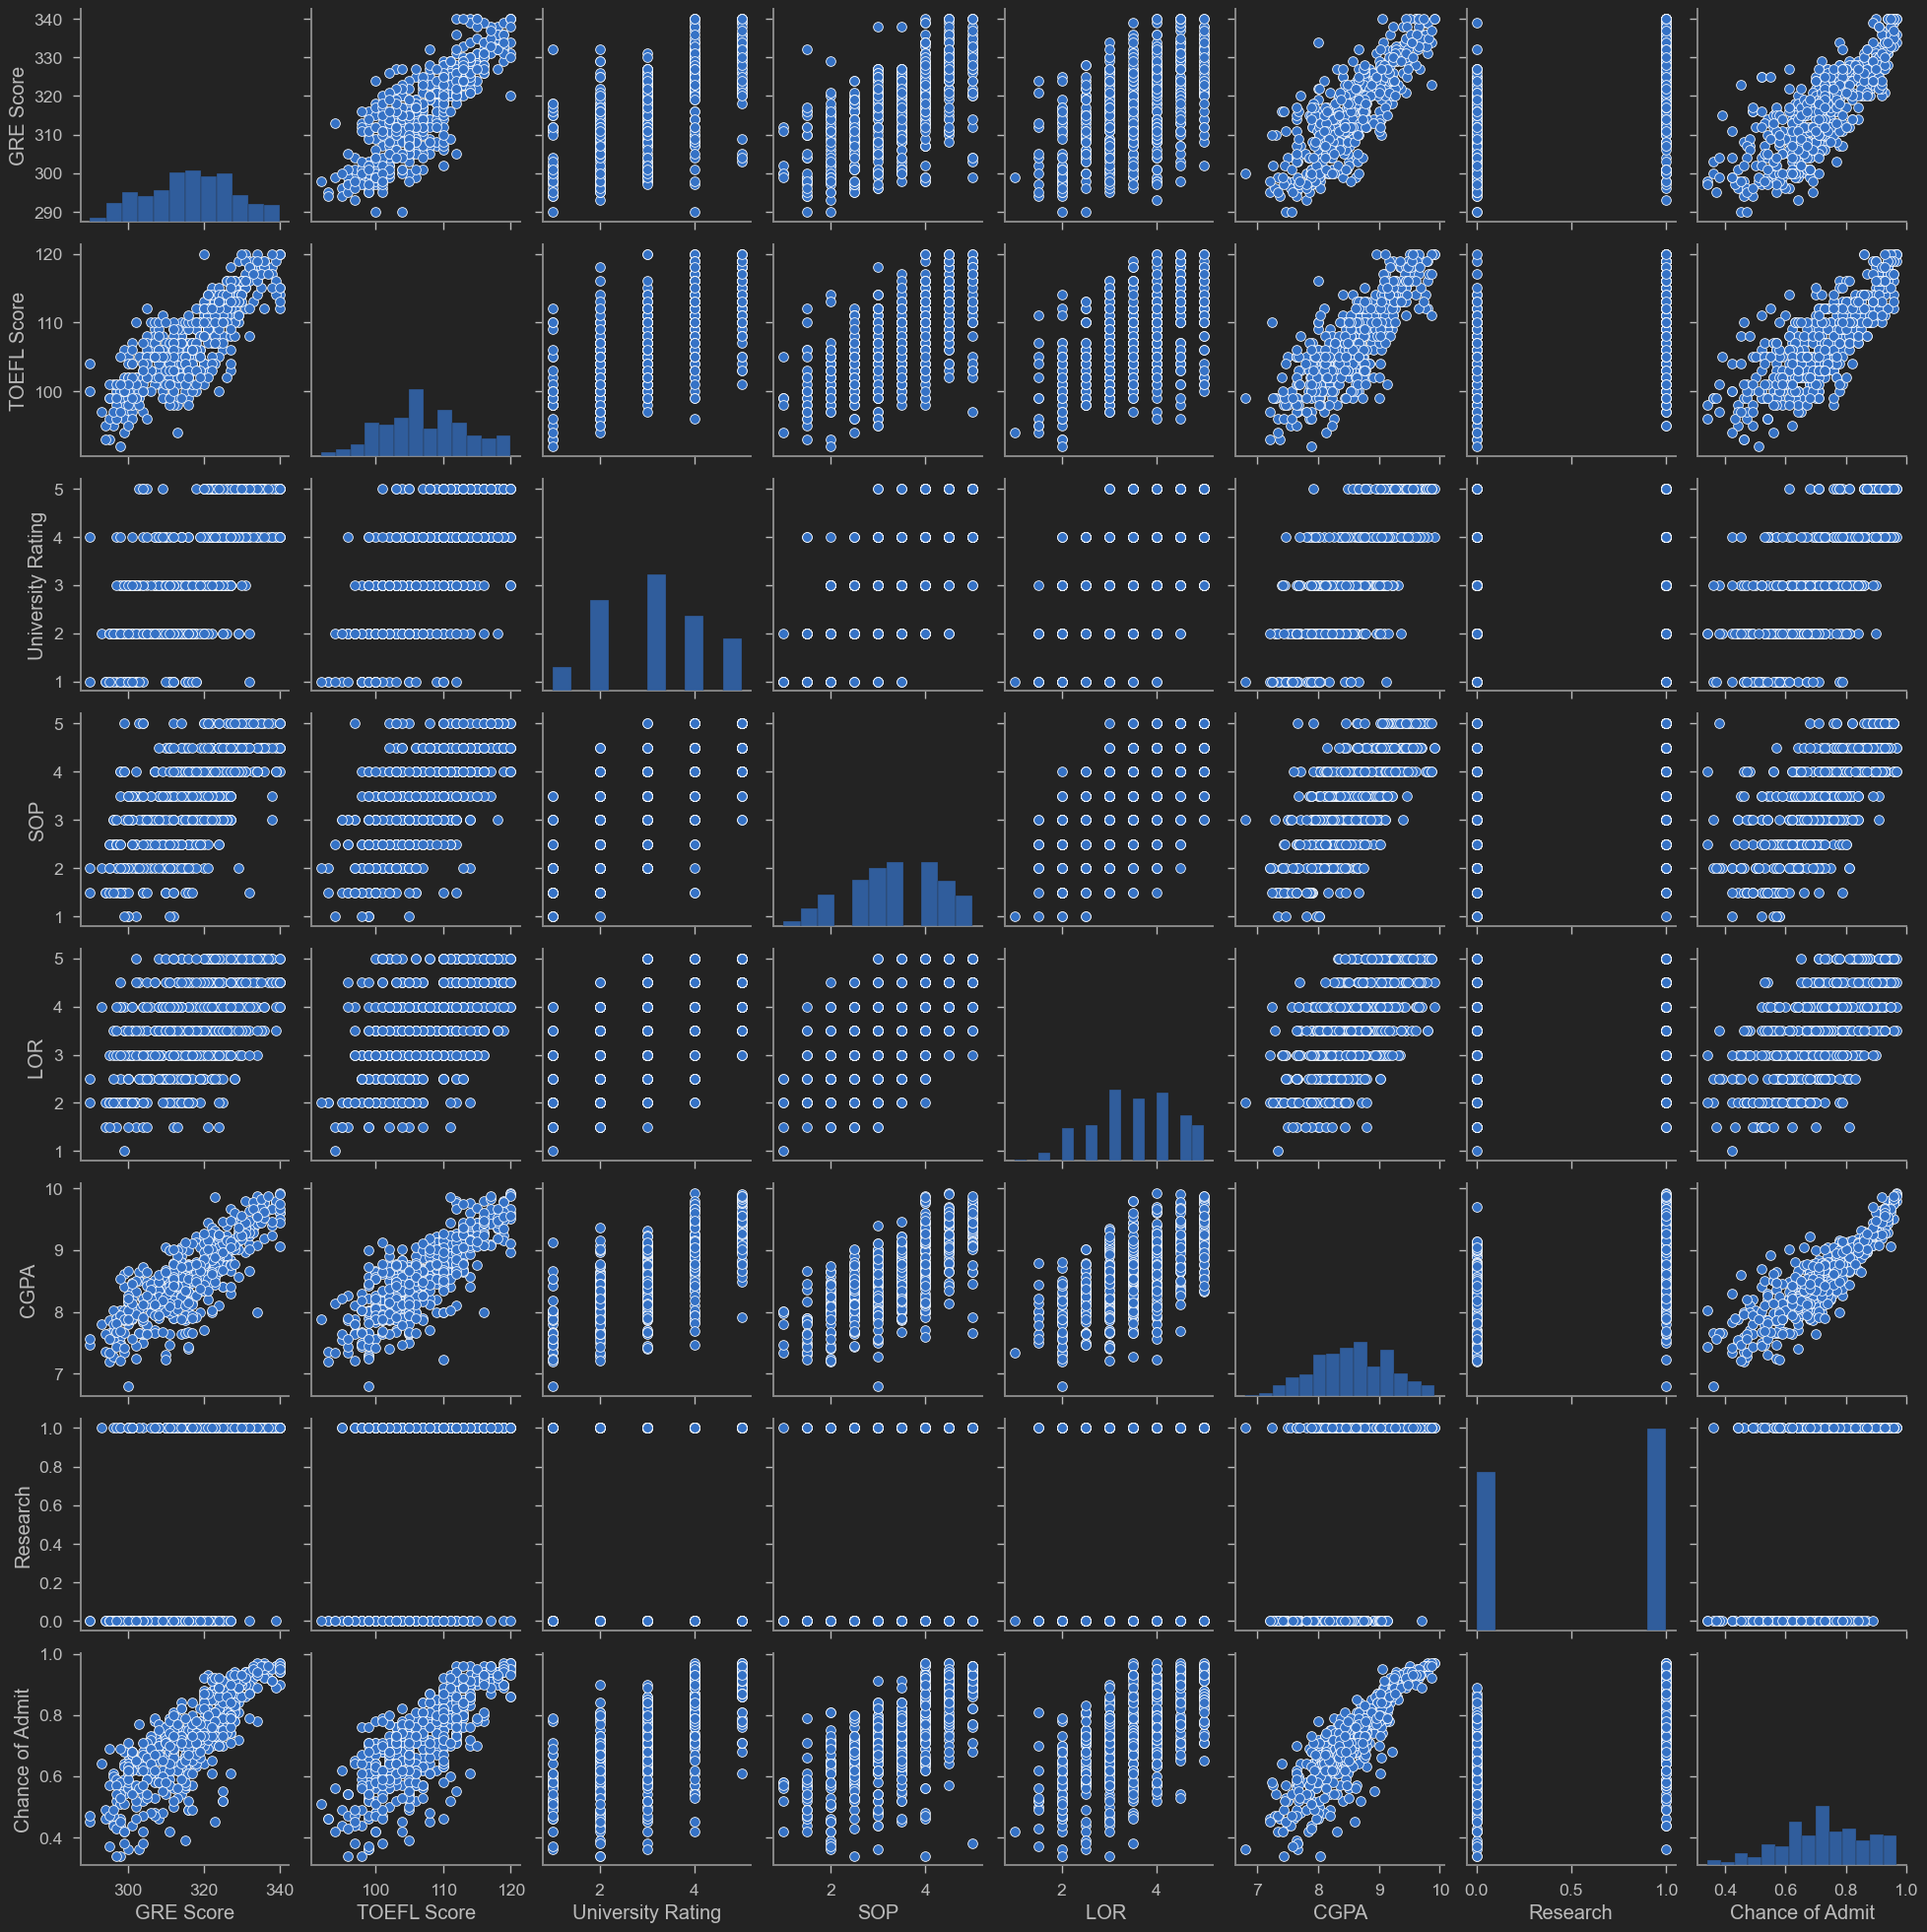

In [34]:
#You can take a look at all the relationship between every single variable or feature in the data frame
#Example: It seems that as the GRE score increases, the chances of admission also increases. The is a 
#positive correlation betweeen these two variables.
# admission_df_drop = admission_df.drop(columns = ['Serial No.'])
sns.pairplot(admission_df)

#Correlation vs causation
#There are three ways to describe the correlation between variables:
    #Positive correlation: As x increases, y increases
    #Negative correlation: As x increases, y decreases
    #No correlation: as x increases, y stays about the same or has no clear pattern

#Scatterplot shows relationships between different variables. Scatterplot are typically used for two variables
#for a set of data, although additional variables can be displayed.

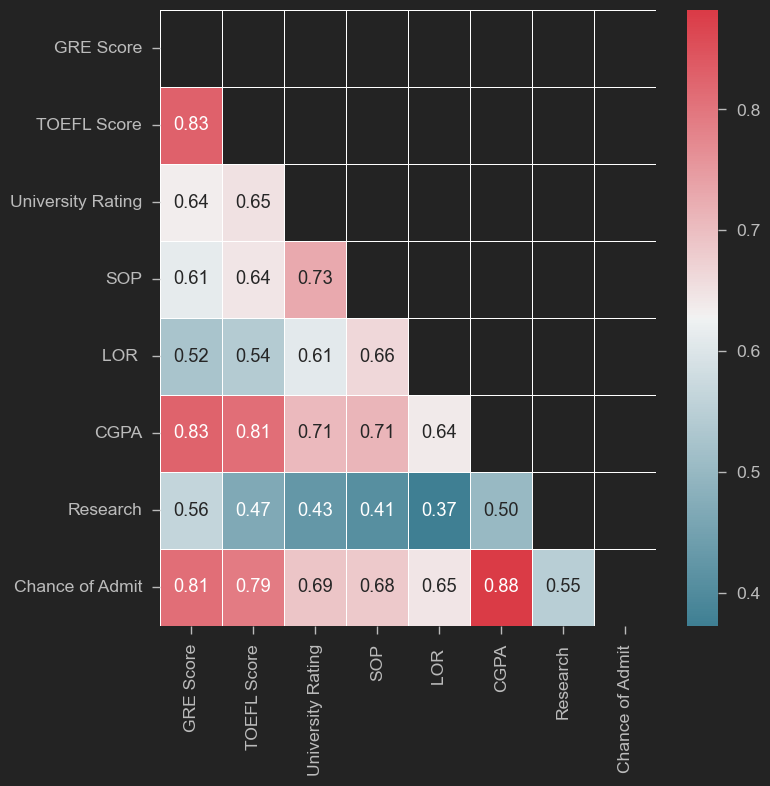

In [17]:
#plot the correlations. 
corr_matrix = admission_df.corr()
fig, ax = plt.subplots(figsize=(8,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()
#Example: students that have a higher TOEFL score tend to have a higher GRE score. The are positevly related
#Heatmap use colors to compare categories in a data set. 
#They are mainly used to show relationships between two variables and used a system of color-coding to represent different values


# TASK #5: CREATE TRAINING AND TESTING DATASET

In [15]:
#take a look at the columns that I have
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [16]:
#I have to divide my data in inputs and outputs. Inputs I will call X and outputs I will call Y
#Basically the scores, ratings are the input and the Chance of admission is the target variable. 
x = admission_df.drop(columns = ['Chance of Admit'])

In [17]:
y = admission_df['Chance of Admit']

In [18]:
x.shape

(500, 7)

In [19]:
y.shape

(500,)

In [20]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [21]:
x = np.array(x)
y = np.array(y)

In [22]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [23]:
# scaling the data before training the model
#scale the data means to all the features to be "equal". I don't the model to be bias to some feature just
#because the range of that data is much larger.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#instantiate an object out of my class
scaler_x = StandardScaler()
#applying the fit transform method passing along the x value, with a new output x
x = scaler_x.fit_transform(x)

In [24]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [25]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

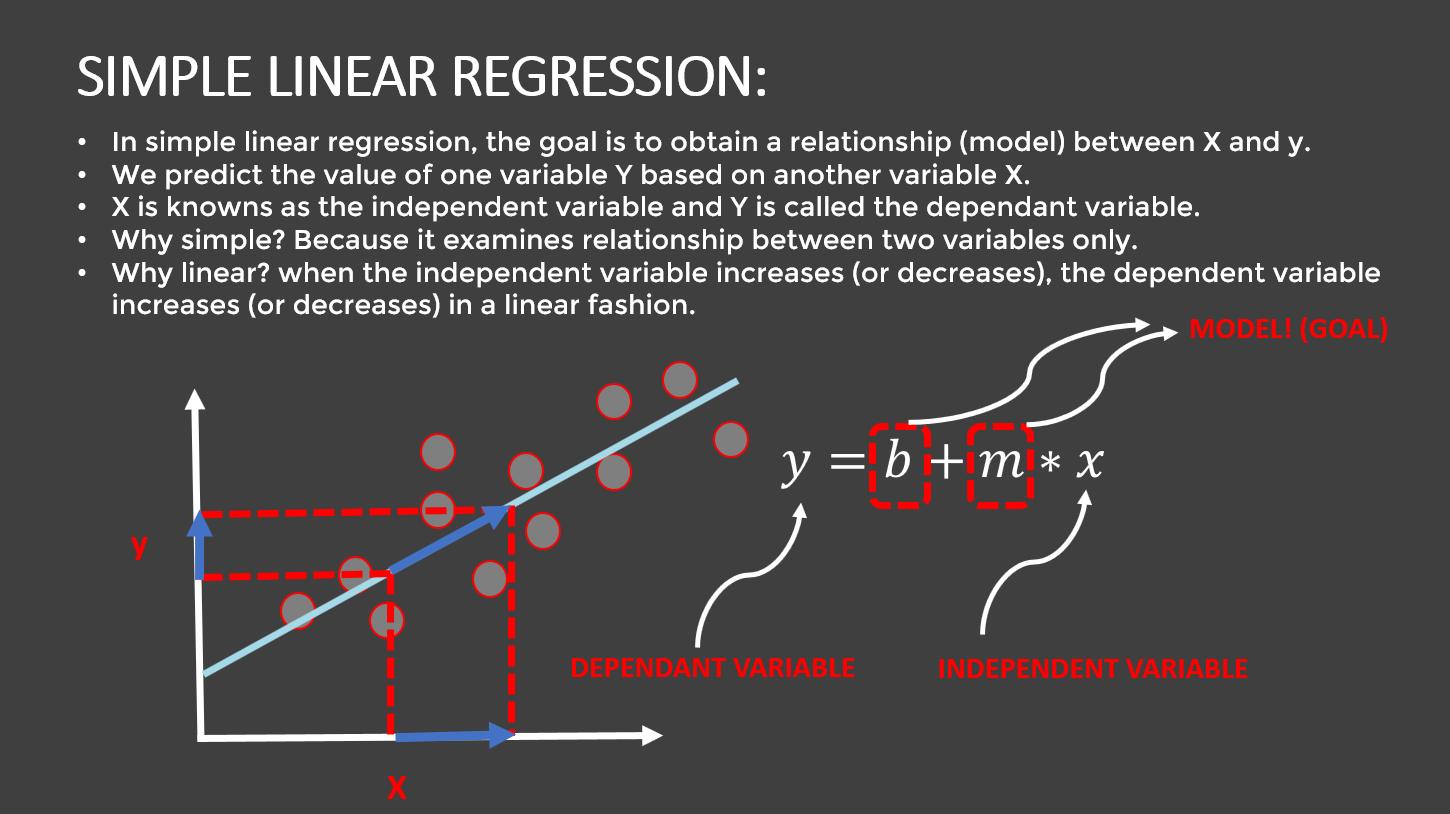

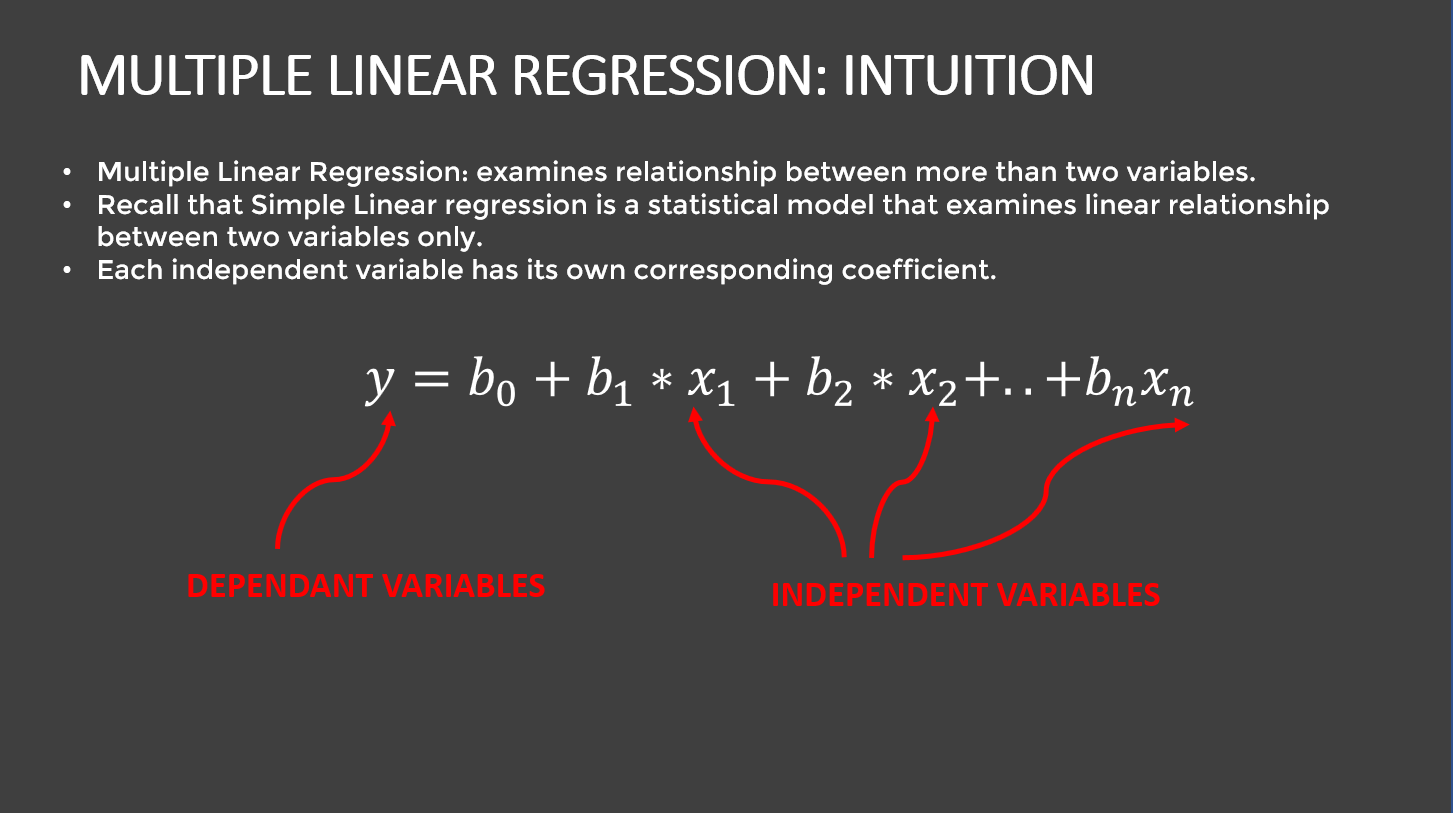

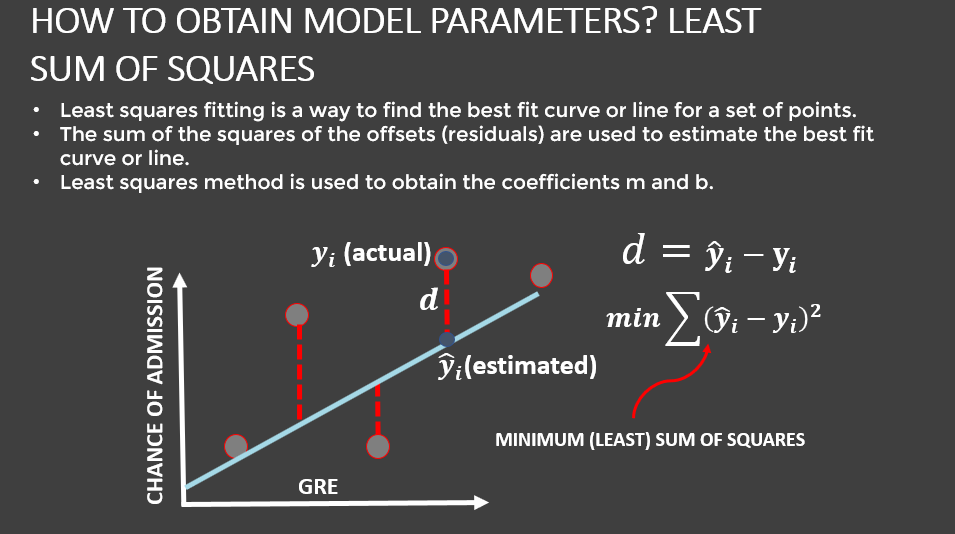

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [27]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)

LinearRegression()

In [28]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_LinearRegression

0.8224461593258522

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

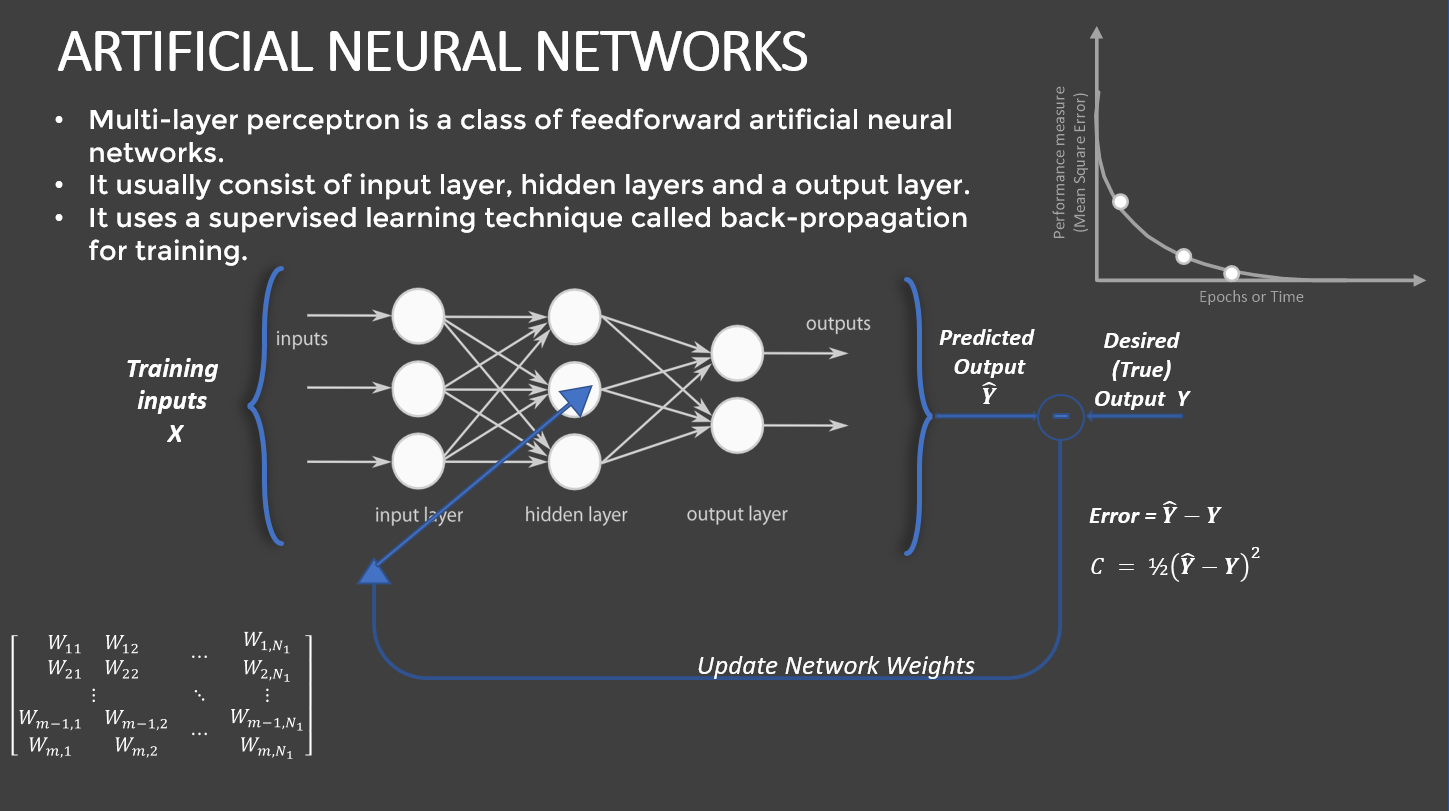

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [30]:
ANN_model = keras.Sequential()
#7 inputs, because I have 7 informations - GRE score, TOEFL, etc
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

#regresion test, so it should be linear
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

#mse = mean squared error
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [31]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [32]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 10ms/step - loss: 0.5890 - val_loss: 0.2269
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3219 - val_loss: 0.2416
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3102 - val_loss: 0.2785
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2828 - val_loss: 0.2425
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2662 - val_loss: 0.2469
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2654 - val_loss: 0.2394
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2442 - val_loss: 0.2441
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2379 - val_loss: 0.2527
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2312 - val_loss: 0.2165
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2435 - val_loss: 0.2654
Epoch 11

In [33]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.2346
Accuracy : 0.7654159069061279


In [34]:
#progression of the network
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

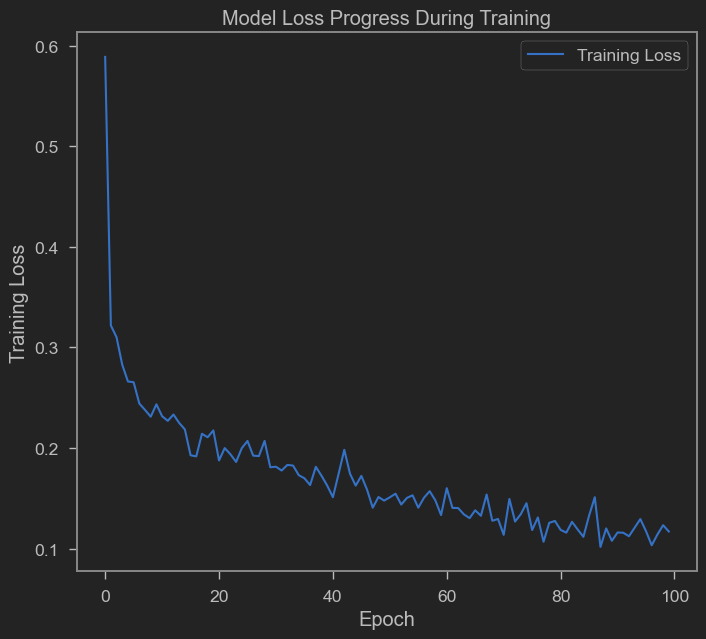

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [36]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [37]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_DecisionTree

0.6653251562802782

In [38]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth = 10)
RandomForest_model.fit(x_train, y_train)

c:\Users\leonv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10)

In [39]:
accuracy_RandomForest = RandomForest_model.score(x_test, y_test) 
accuracy_RandomForest

0.8044234393810978

# TASK #9: UNDERSTAND VARIOUS REGRESSION KPIs

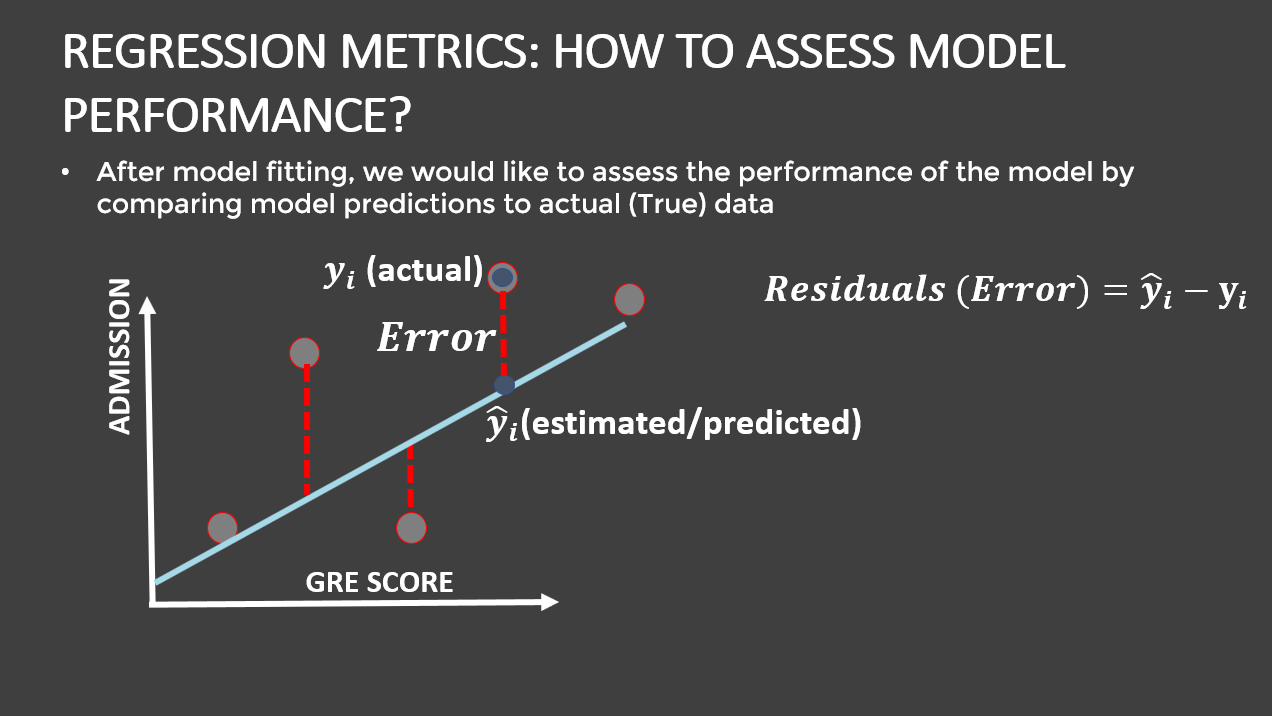

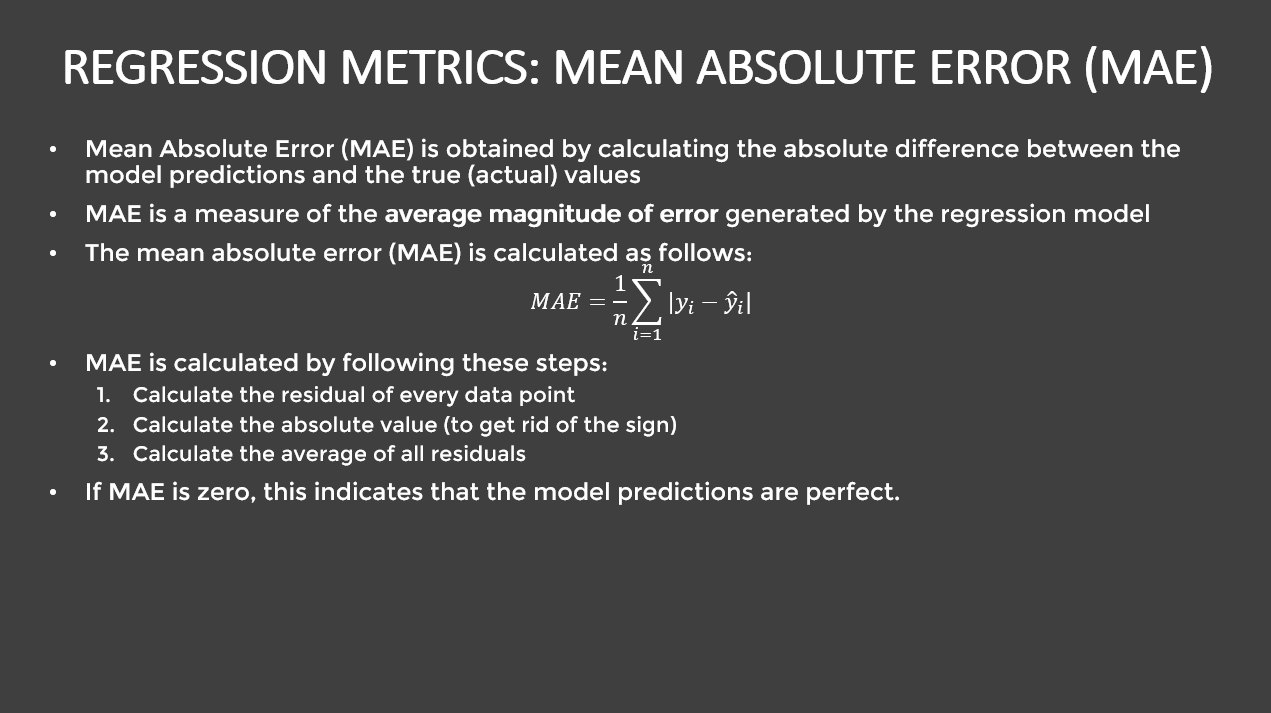

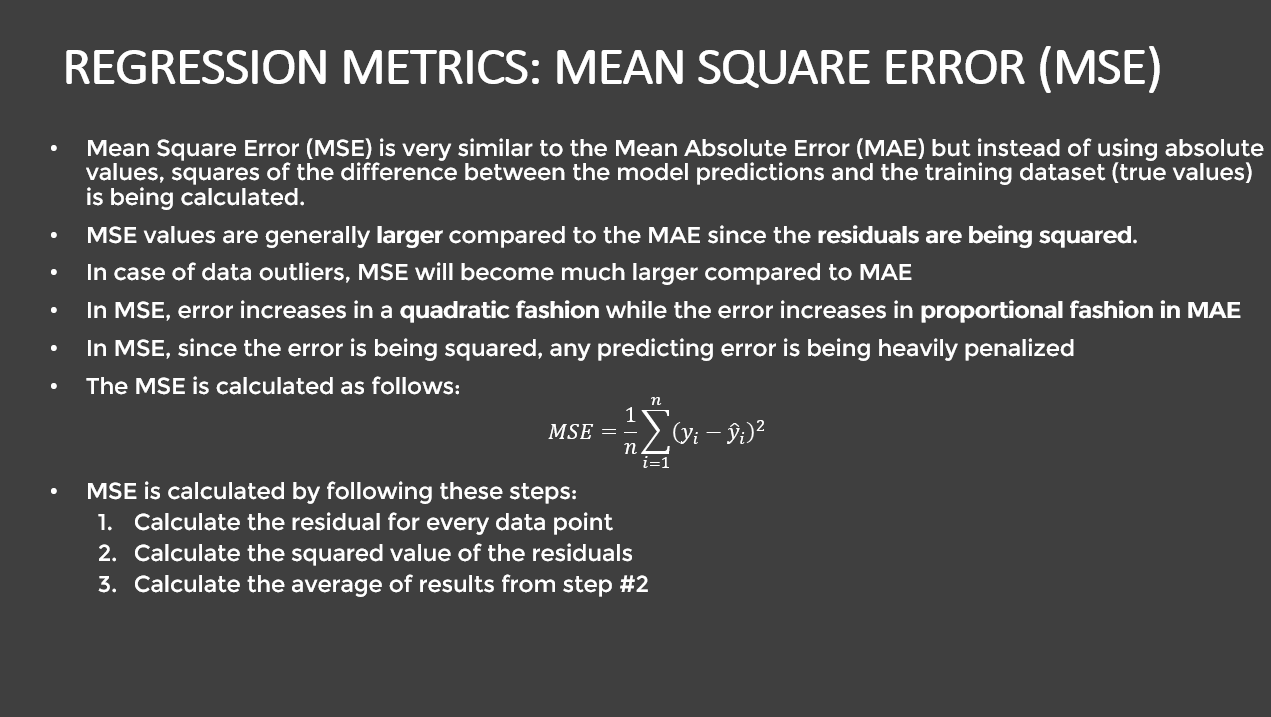

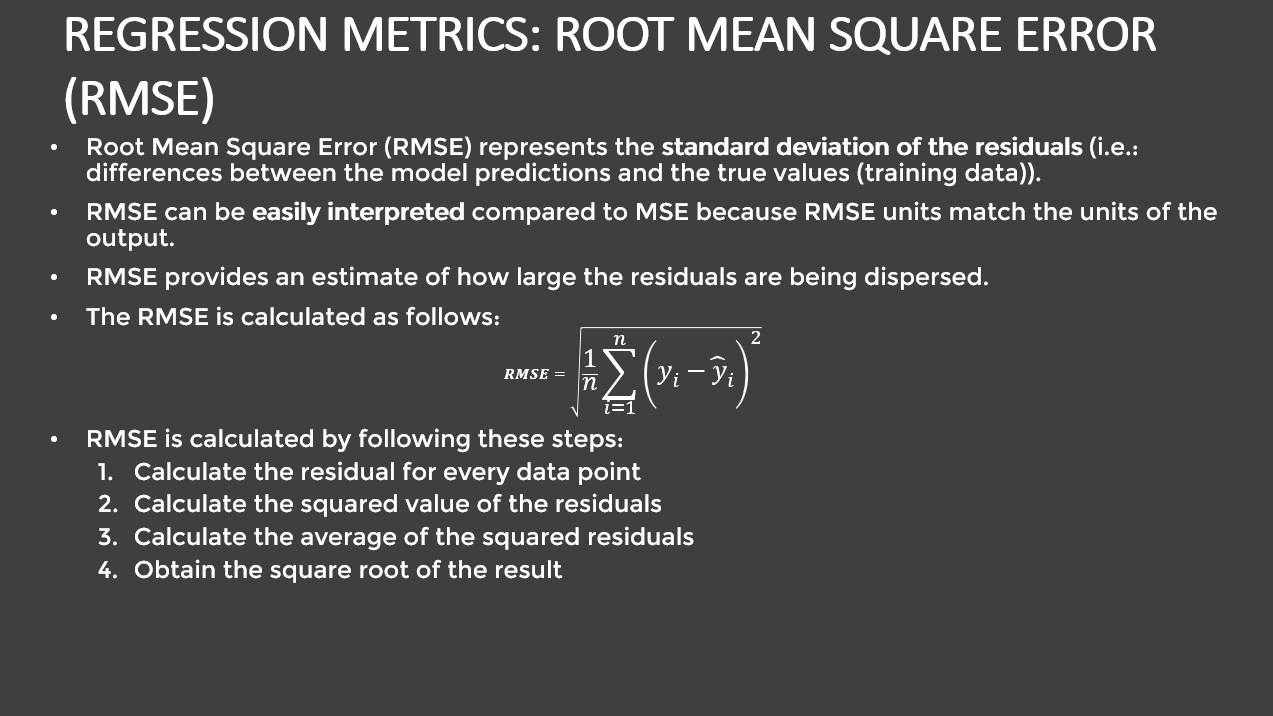

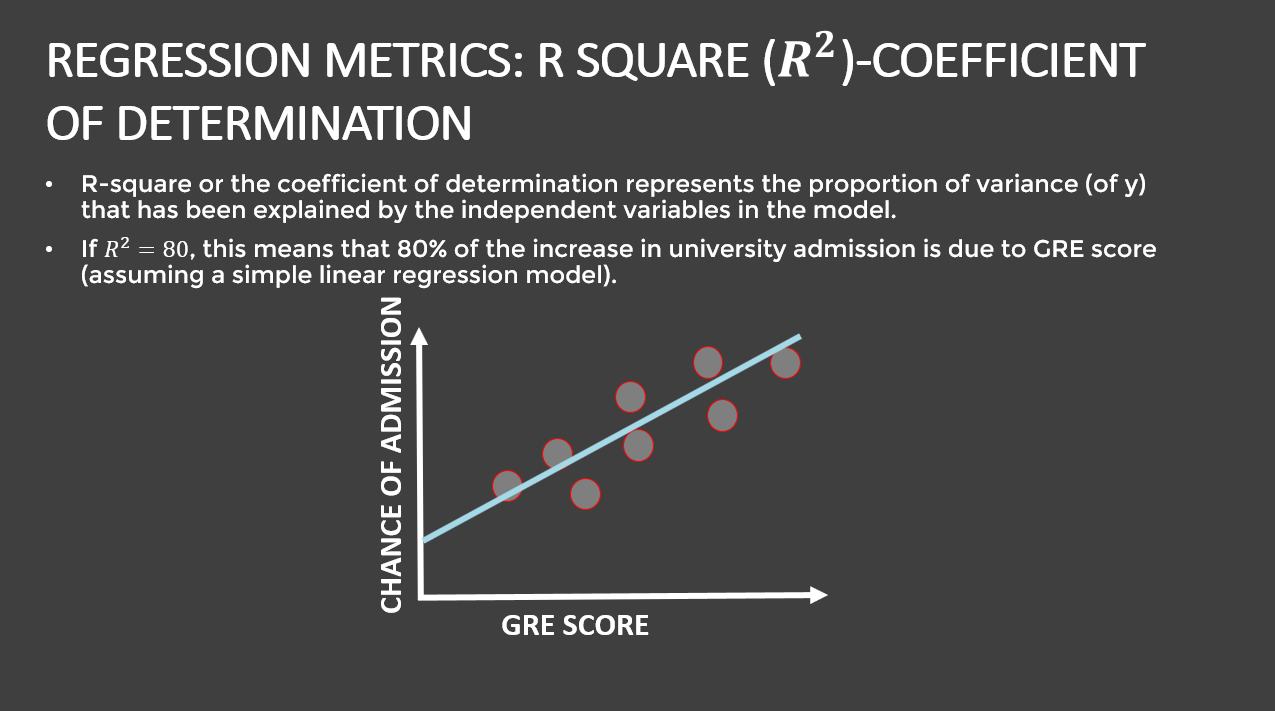

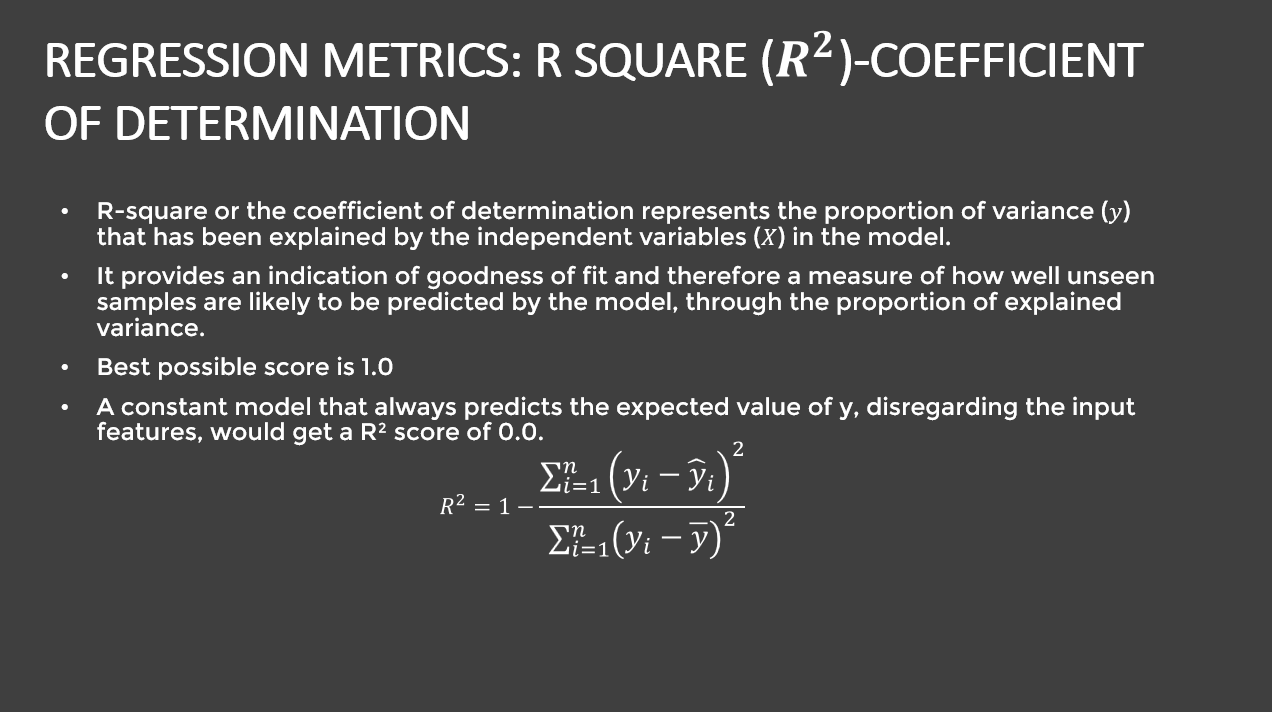

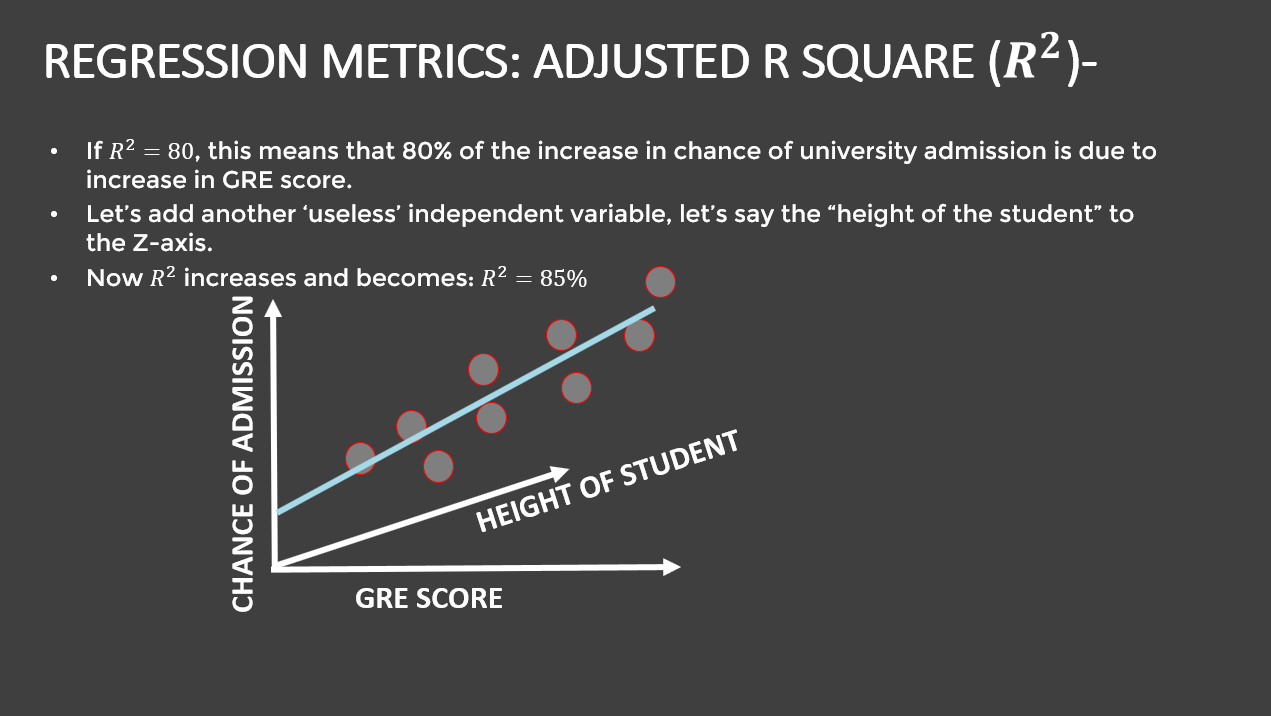

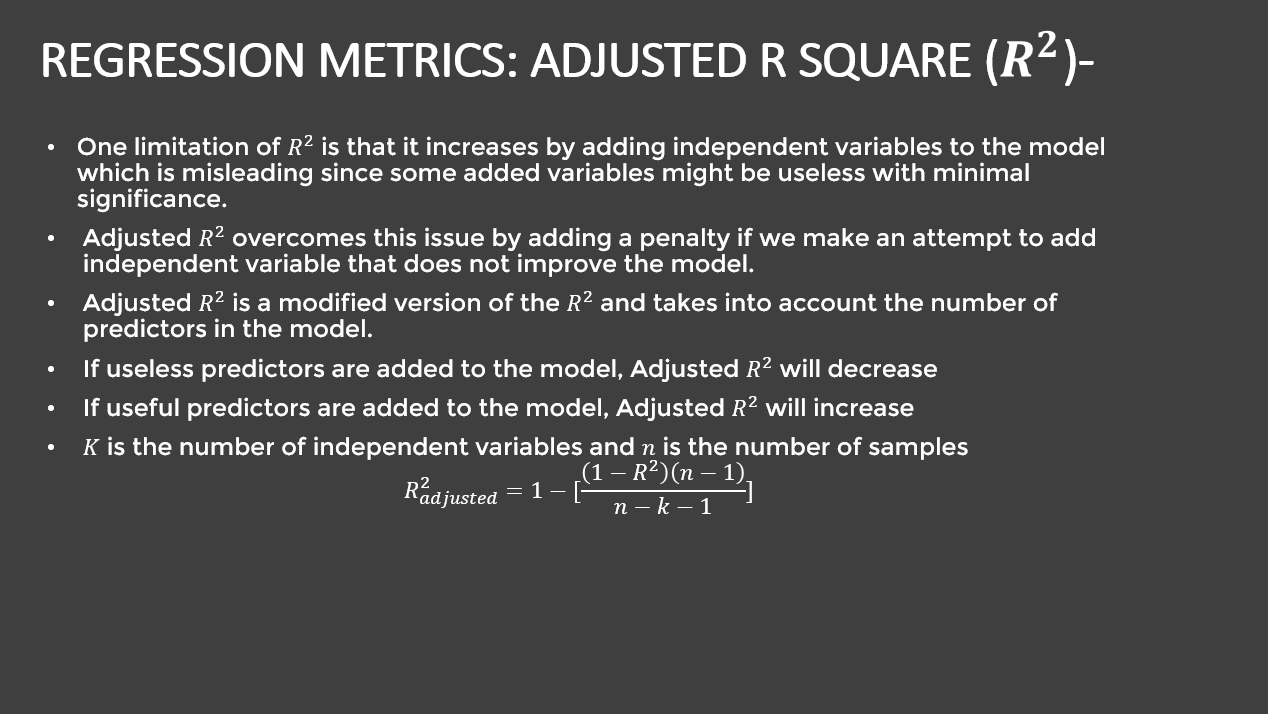

# TASK #10: CALCULATE REGRESSION MODEL KPIs

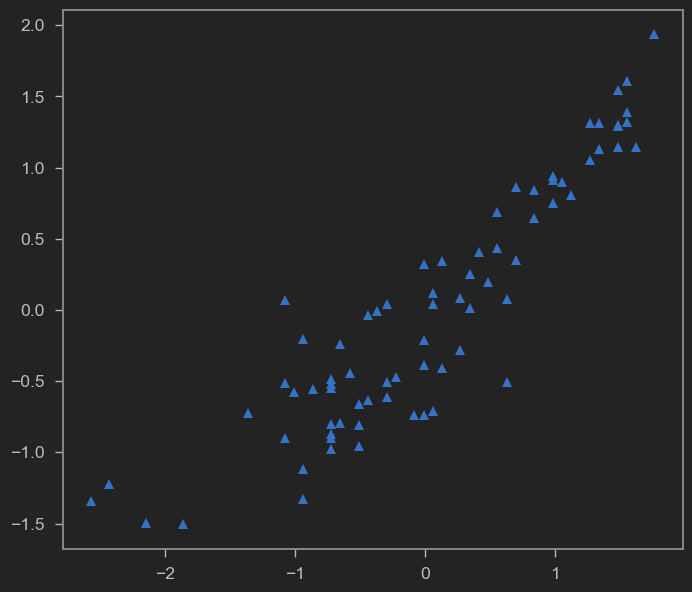

In [40]:
y_predict = LinearRegression_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'b')

In [41]:
#apply inverse transform to represent the data in its original units. 
y_predict_original = scaler_y.inverse_transform(y_predict)
y_test_original = scaler_y.inverse_transform(y_test)

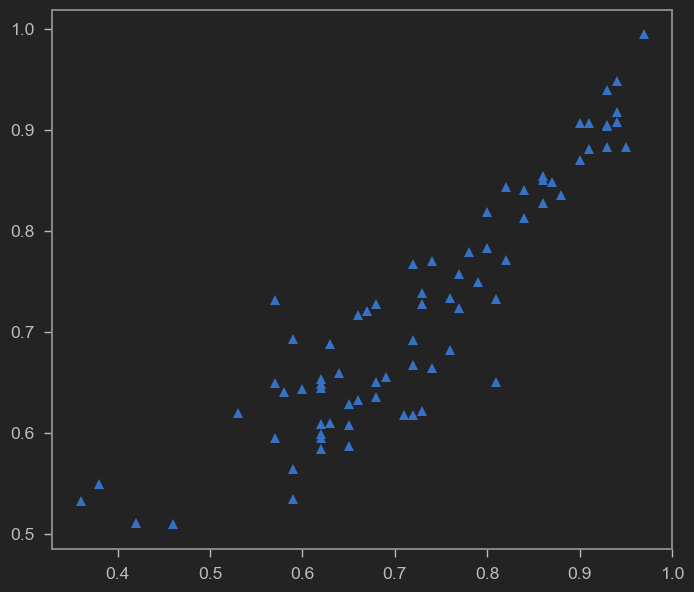

In [42]:
plt.plot(y_test_original, y_predict_original, '^', color='b')

In [43]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)),'.3f'))
MSE = mean_squared_error(y_test_original, y_predict_original)
MAE = mean_absolute_error(y_test_original, y_predict_original)
r2 = r2_score(y_test_original, y_predict_original)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.059 
MSE = 0.0035184510979770376 
MAE = 0.04516925542940263 
R2 = 0.8224461593258521 
Adjusted R2 = 0.8038957580613889
